Loading the data

In [1]:
import pandas as pd
columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
data_cleveland = pd.read_csv('heart+disease\processed.cleveland.data', header=None)
data_hungary = pd.read_csv('heart+disease\processed.hungarian.data', header=None)
data_switzerland = pd.read_csv('heart+disease\processed.switzerland.data', header=None)
data_va = pd.read_csv('heart+disease\processed.va.data', header=None)


data = pd.concat([data_cleveland, data_hungary, data_switzerland, data_va])

data.columns = columns

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

train_data = data[:split_index]
test_data = data[split_index:]

print(train_data.head())

### Remove test and validation data


    age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
0  36.0  1.0  2.0      120    166    0       0     180     0     0.0     ?   
1  45.0  1.0  2.0      140    224    1       0     122     0     0.0     ?   
2  48.0  1.0  4.0      160    329    0       0      92     1     1.5     2   
3  59.0  1.0  4.0    164.0  176.0  1.0     2.0    90.0   0.0     1.0   2.0   
4  40.0  0.0  4.0      150    392    0       0     130     0     2.0     2   

    ca thal  num  
0    ?    ?    0  
1    ?    ?    0  
2    ?    ?    1  
3  2.0  6.0    3  
4    ?    6    1  


### cleaning the data

C:\Users\Ian\AppData\Local\Temp\ipykernel_21228\2178193851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['num'] = train_data['num'].apply(lambda x: 1 if x > 0 else 0)


<BarContainer object of 2 artists>

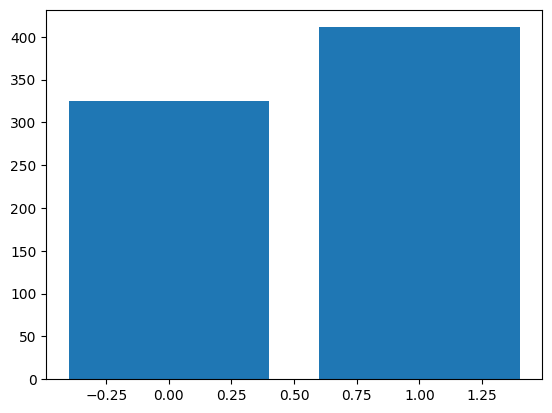

In [2]:
import matplotlib.pyplot as plt

train_data['num'] = train_data['num'].apply(lambda x: 1 if x > 0 else 0)

plt.bar(train_data['num'].value_counts().index, train_data['num'].value_counts().values)

The dataset here is unbalanced

In [3]:
train_data = train_data.replace('?', None)
missing_data = train_data.isnull().sum()
missing_data = missing_data[missing_data > 0]

print(missing_data)

trestbps     50
chol         25
fbs          71
restecg       2
thalach      46
exang        46
oldpeak      53
slope       258
ca          490
thal        382
dtype: int64


In [4]:
train_data = train_data.drop(columns=['ca', 'thal', 'slope'])
train_data.dropna(inplace=True)

<BarContainer object of 2 artists>

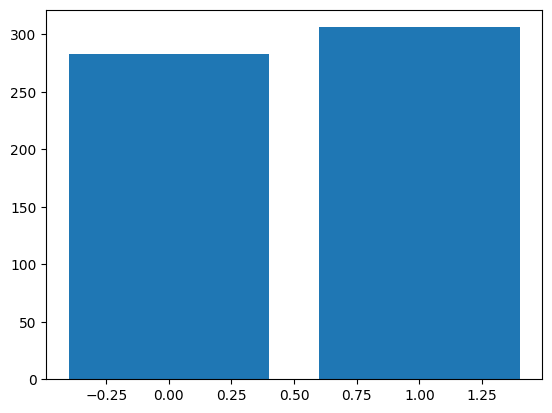

In [5]:
import matplotlib.pyplot as plt

train_data['num'] = train_data['num'].apply(lambda x: 1 if x > 0 else 0)

plt.bar(train_data['num'].value_counts().index, train_data['num'].value_counts().values)

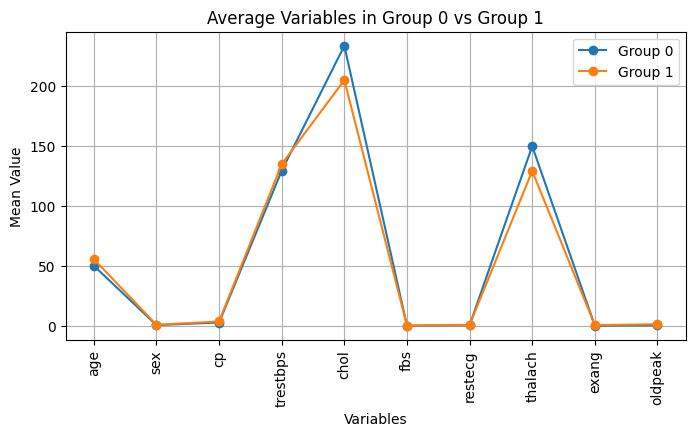

In [6]:

columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","num"]

data_temp = train_data[columns]
# Convert columns to numeric (if needed)
data_temp[columns] = train_data[columns].apply(pd.to_numeric, errors='coerce')

# Calculate mean for each group
group_means = data_temp.groupby('num').mean(numeric_only=True)

# Select two groups (e.g., num=0 and num=1)
group_0 = group_means.loc[0]
group_1 = group_means.loc[1]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(group_0.index, group_0.values, label='Group 0', marker='o')
plt.plot(group_1.index, group_1.values, label='Group 1', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Average Variables in Group 0 vs Group 1')
plt.legend()
plt.grid(True)
plt.show()

We can see large changes, but the scale is all wrong. We need to normalize. Before this, we need to check the distribution of our integer values.

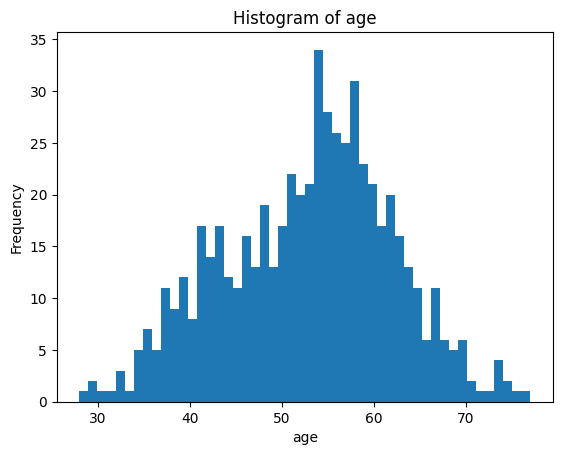

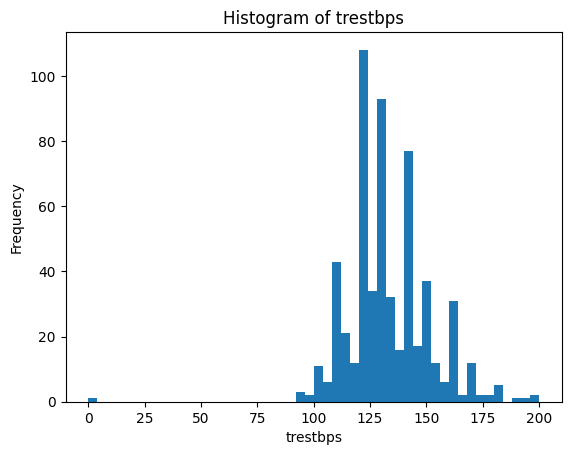

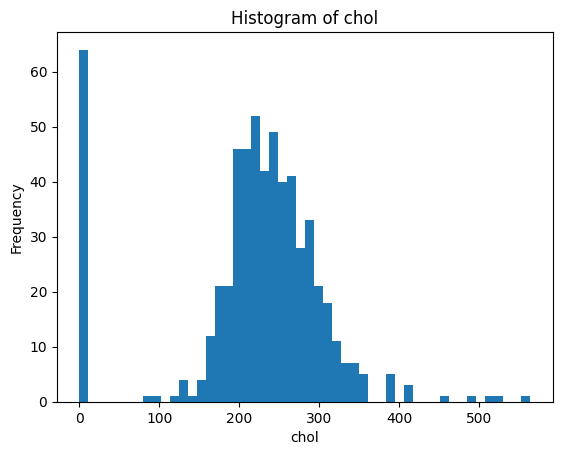

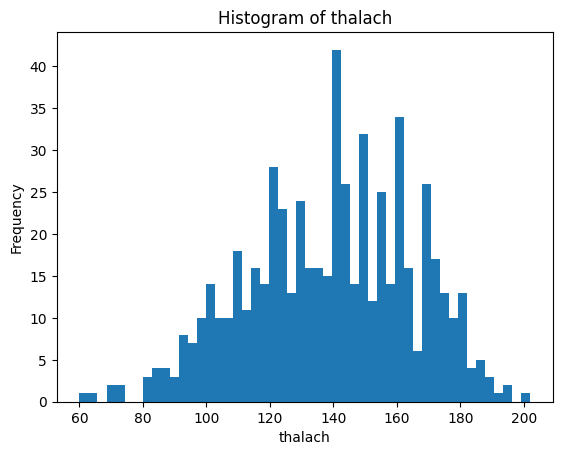

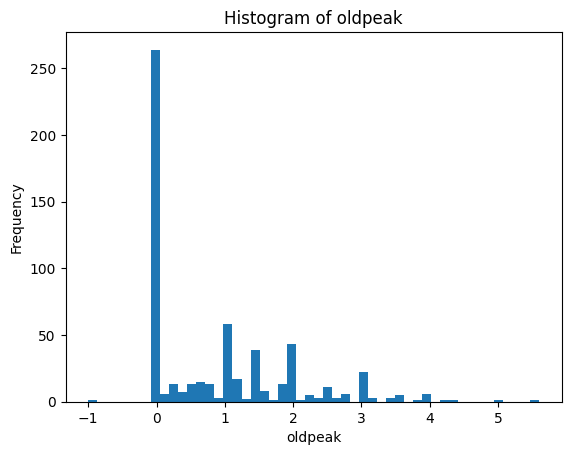

In [7]:
# Select integer columns
integer_columns = ["age","trestbps","chol","thalach","oldpeak"]

# Convert to numeric
train_data = train_data.apply(pd.to_numeric, errors='coerce')

# Plot each column as a histogram
for col in integer_columns:
    plt.figure()
    plt.hist(train_data[col].dropna(), bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

A few notable abnormalities are: a couple cases had a trestbps of 0, and many had a cholestoral of 0, which is clearly an error, and should be treated as a null value and dropped. 

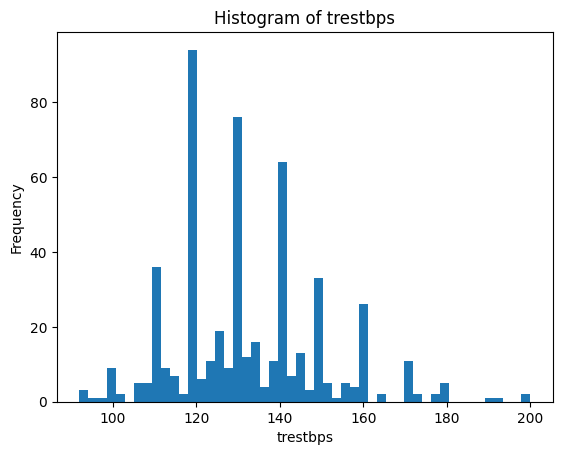

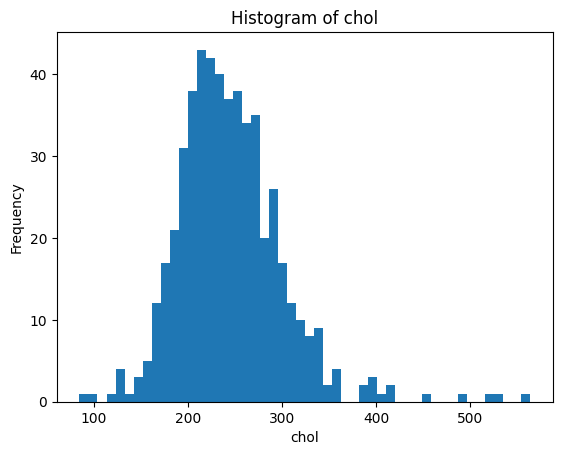

In [8]:
train_data['trestbps'] = train_data['trestbps'].replace(0, None)
train_data['chol'] = train_data['chol'].replace(0, None)
train_data.dropna(inplace=True)
# Select integer columns
integer_columns = ["trestbps","chol"]

# Convert to numeric
train_data = train_data.apply(pd.to_numeric, errors='coerce')

# Plot each column as a histogram
for col in integer_columns:
    plt.figure()
    plt.hist(train_data[col].dropna(), bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Now it's time to normalize our values

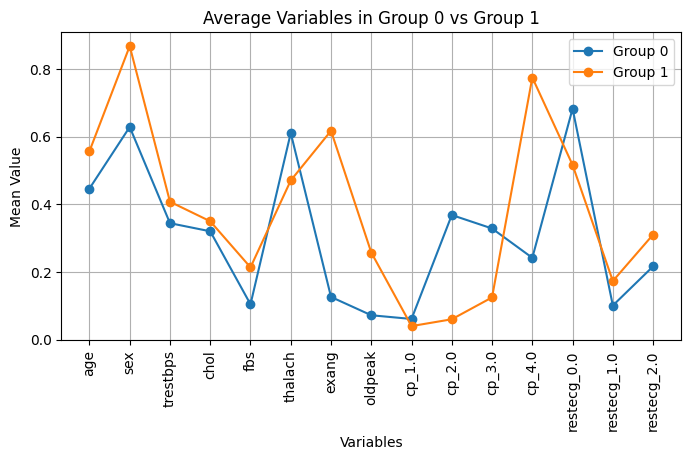

In [9]:
integer_columns = ["age","trestbps","chol","thalach","oldpeak"]

train_data[integer_columns] = train_data[integer_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else x)


columns_to_one_hot_encode = ["cp","restecg"]

train_data = pd.get_dummies(train_data, columns=columns_to_one_hot_encode, dtype=int)


columns = train_data.columns

data_temp = train_data[columns]
# Convert columns to numeric (if needed)
data_temp[columns] = train_data[columns].apply(pd.to_numeric, errors='coerce')

# Calculate mean for each group
group_means = data_temp.groupby('num').mean(numeric_only=True)

# Select two groups (e.g., num=0 and num=1)
group_0 = group_means.loc[0]
group_1 = group_means.loc[1]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(group_0.index, group_0.values, label='Group 0', marker='o')
plt.plot(group_1.index, group_1.values, label='Group 1', marker='o')
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.title('Average Variables in Group 0 vs Group 1')
plt.legend()
plt.grid(True)
plt.show()


Lots of features here seem to be pretty informative, but we can use a significance test to find the ones which are most informative

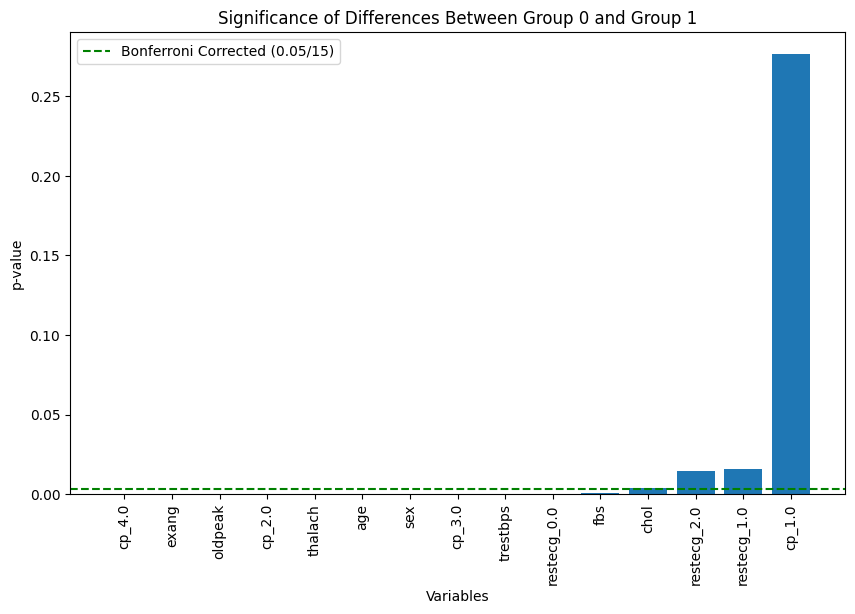

In [10]:
from scipy.stats import ttest_ind
train_data[columns] = train_data[columns].apply(pd.to_numeric, errors='coerce')
# Split the data into groups
group_0 = train_data[train_data['num'] == 0]
group_1 = train_data[train_data['num'] == 1]

# Perform t-test for each variable
p_values = {}
for col in group_0.columns:
    if col != 'num':
        t_stat, p_val = ttest_ind(group_0[col].dropna(), group_1[col].dropna(), nan_policy='omit')
        p_values[col] = p_val


sorted_p_values = dict(sorted(p_values.items(), key=lambda item: item[1]))

num_tests = len(sorted_p_values)
bonferroni_corrected_p_value = 0.05 / num_tests

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.bar(sorted_p_values.keys(), sorted_p_values.values())
plt.axhline(y=bonferroni_corrected_p_value, color='g', linestyle='--', label=f'Bonferroni Corrected (0.05/{num_tests})')
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('p-value')
plt.title('Significance of Differences Between Group 0 and Group 1')
plt.legend()
plt.show()

Now we have our list of the most important features! This will be useful later. Let's just make sure to do all the same operations to the test set.

In [11]:
class HeartDiseasePreprocessor:
    def __init__(self):
        self.integer_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
        self.columns_to_one_hot_encode = ["cp", "restecg"]
        self.min_vals = {}
        self.max_vals = {}
        self.final_columns = None

    def fit(self, df):
        """
        Fit the preprocessor on the training data. 
        Stores the min/max values and the final columns after one-hot encoding.
        """
        
        # Convert to numeric
        df = df.apply(pd.to_numeric, errors='coerce')

        # Replace '?' with None
        df = df.replace('?', None)

        # Convert target to binary (num > 0 => 1, else 0)
        df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

        # Replace 0 with None in specific columns
        df['trestbps'] = df['trestbps'].replace(0, None)
        df['chol'] = df['chol'].replace(0, None)

        # Drop rows with missing values
        df.dropna(inplace=True)

        # Compute and store min/max for integer_columns
        for col in self.integer_columns:
            self.min_vals[col] = df[col].min()
            self.max_vals[col] = df[col].max()

        # Normalize integer columns (train data only)
        for col in self.integer_columns:
            min_val = self.min_vals[col]
            max_val = self.max_vals[col]
            if min_val != max_val:
                df[col] = (df[col] - min_val) / (max_val - min_val)

        # One-hot encode specified columns
        df = pd.get_dummies(df, columns=self.columns_to_one_hot_encode, dtype=int)
        # Drop uninformative columns
        df = df.drop(columns=['chol', 'restecg_2.0', 'restecg_1.0',"cp_1.0"])
        # Store final columns for later use
        self.final_columns = df.columns

    def transform(self, df):
        """
        Transform the test data using min/max from the fitted training data,
        applying the same cleaning, binarization, and one-hot encoding.
        """
        # Convert to numeric
        df = df.apply(pd.to_numeric, errors='coerce')

        # Replace '?' with None
        df = df.replace('?', None)

        # Convert target to binary (num > 0 => 1, else 0)
        df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

        # Replace 0 with None in specific columns
        df['trestbps'] = df['trestbps'].replace(0, None)
        df['chol'] = df['chol'].replace(0, None)

        # Drop rows with missing values
        df.dropna(inplace=True)

        # Normalize using stored min/max
        for col in self.integer_columns:
            min_val = self.min_vals.get(col, None)
            max_val = self.max_vals.get(col, None)
            if min_val is not None and max_val is not None and min_val != max_val:
                df[col] = (df[col] - min_val) / (max_val - min_val)

        # One-hot encode
        df = pd.get_dummies(df, columns=self.columns_to_one_hot_encode, dtype=int)

        # Ensure test set has same columns as training set
        missing_cols = set(self.final_columns) - set(df.columns)
        for col in missing_cols:
            df[col] = 0
        # Reorder columns
        df = df[self.final_columns]

        return df




# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

train_data = data[:split_index].copy()
test_data = data[split_index:].copy()

# usage:
preprocessor = HeartDiseasePreprocessor()
preprocessor.fit(train_data)
train_data = preprocessor.transform(train_data)
test_data = preprocessor.transform(test_data)

Now, let's look at our penguin dataset

In [12]:
penguin_data = pd.read_csv('penguins_lter.csv')

# Shuffle the data
penguin_data = penguin_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(penguin_data) * split_ratio)

penguin_train_data = penguin_data[:split_index]
penguin_test_data = penguin_data[split_index:]

print(penguin_train_data.head())

  studyName  Sample Number                                    Species  Region  \
0   PAL0809             43  Chinstrap penguin (Pygoscelis antarctica)  Anvers   
1   PAL0708              6  Chinstrap penguin (Pygoscelis antarctica)  Anvers   
2   PAL0708              6          Gentoo penguin (Pygoscelis papua)  Anvers   
3   PAL0910             57  Chinstrap penguin (Pygoscelis antarctica)  Anvers   
4   PAL0910             99          Gentoo penguin (Pygoscelis papua)  Anvers   

   Island               Stage Individual ID Clutch Completion  Date Egg  \
0   Dream  Adult, 1 Egg Stage         N75A1               Yes  11/14/08   
1   Dream  Adult, 1 Egg Stage         N64A2               Yes  11/21/07   
2  Biscoe  Adult, 1 Egg Stage         N33A2               Yes  11/18/07   
3   Dream  Adult, 1 Egg Stage         N94A1               Yes  11/21/09   
4  Biscoe  Adult, 1 Egg Stage         N21A1               Yes  11/18/09   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm) 

First we need to remove the "Island" field, as per reccomendation

In [13]:
penguin_train_data = penguin_train_data.drop(["Island"], axis=1)

In [14]:
missing_data = penguin_train_data.isnull().sum()
missing_data = missing_data[missing_data > 0]

print(missing_data)

Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       12
Delta 13 C (o/oo)       12
Comments               252
dtype: int64


In [15]:
penguin_train_data = penguin_train_data.drop(["Comments"], axis=1)
penguin_train_data.dropna(inplace=True)
print('here')

here


In [16]:
unique_values = penguin_train_data.nunique()
print(unique_values)

studyName                3
Sample Number          143
Species                  3
Region                   1
Stage                    1
Individual ID          171
Clutch Completion        2
Date Egg                49
Culmen Length (mm)     142
Culmen Depth (mm)       76
Flipper Length (mm)     52
Body Mass (g)           86
Sex                      3
Delta 15 N (o/oo)      258
Delta 13 C (o/oo)      258
dtype: int64


In [17]:
penguin_train_data = penguin_train_data.drop(["Region", "Stage", "Individual ID", "Sample Number", "studyName"], axis=1)

In [18]:
unique_values = penguin_train_data.nunique()
print(unique_values)
data_types = penguin_train_data.dtypes
print(data_types)

Species                  3
Clutch Completion        2
Date Egg                49
Culmen Length (mm)     142
Culmen Depth (mm)       76
Flipper Length (mm)     52
Body Mass (g)           86
Sex                      3
Delta 15 N (o/oo)      258
Delta 13 C (o/oo)      258
dtype: int64
Species                 object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object


In [19]:
penguin_train_data['Species'] = penguin_train_data['Species'].map({'Adelie Penguin (Pygoscelis adeliae)': 0, 'Chinstrap penguin (Pygoscelis antarctica)': 1, 'Gentoo penguin (Pygoscelis papua)': 2})
penguin_train_data['Clutch Completion'] = penguin_train_data['Clutch Completion'].map({'Yes': 1, 'No': 0})
penguin_train_data['Sex'] = penguin_train_data['Sex'].map({'MALE': 1, 'FEMALE': 0, ".": None})

# Convert the date column to datetime
penguin_train_data['Date Egg'] = pd.to_datetime(penguin_train_data['Date Egg'])

# Convert the datetime to the number of days since Unix epoch (1970-01-01)
penguin_train_data['Date Egg'] = (penguin_train_data['Date Egg'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

penguin_train_data.dropna(inplace=True)

C:\Users\Ian\AppData\Local\Temp\ipykernel_21228\3686100395.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  penguin_train_data['Date Egg'] = pd.to_datetime(penguin_train_data['Date Egg'])


In [20]:
data_types = penguin_train_data.dtypes

print(data_types)

Species                  int64
Clutch Completion        int64
Date Egg                 int64
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                    float64
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
dtype: object


Norm time


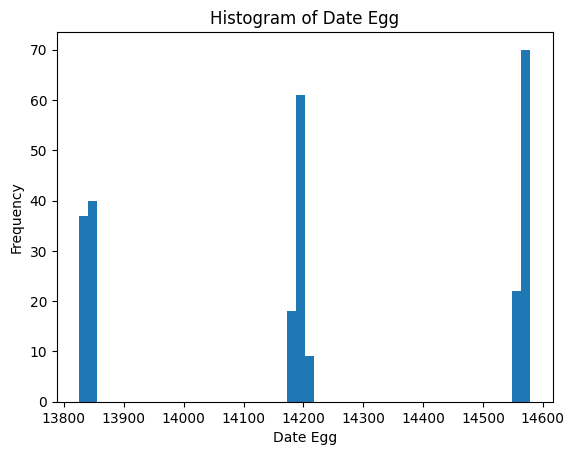

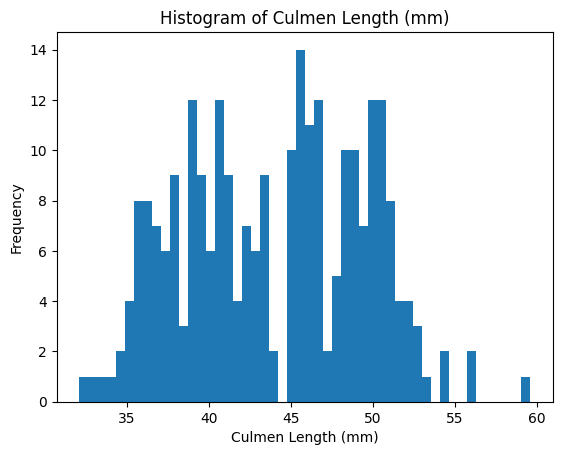

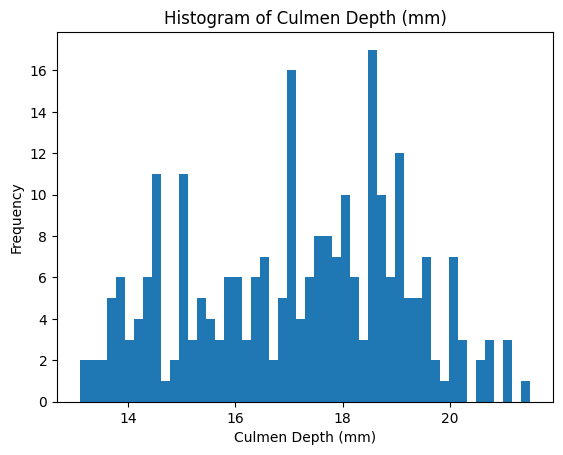

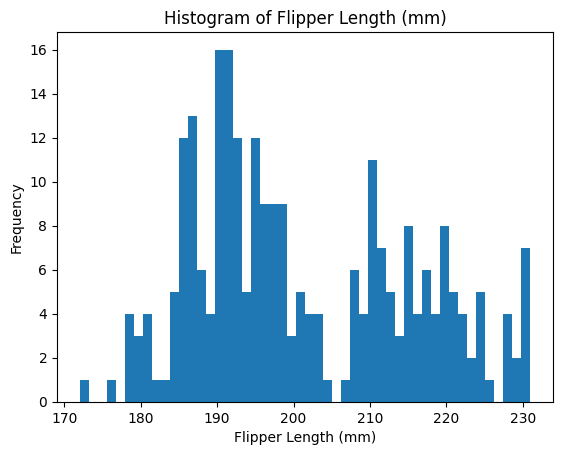

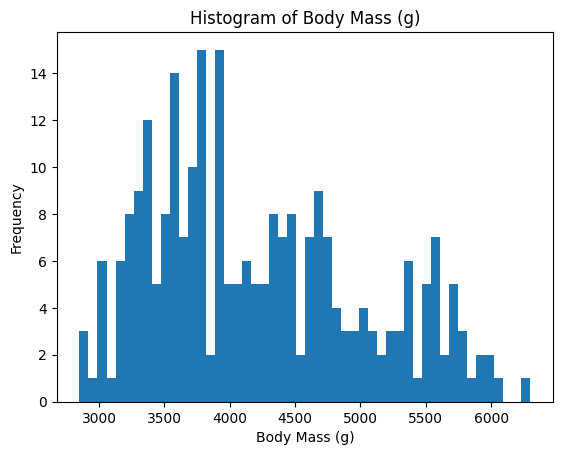

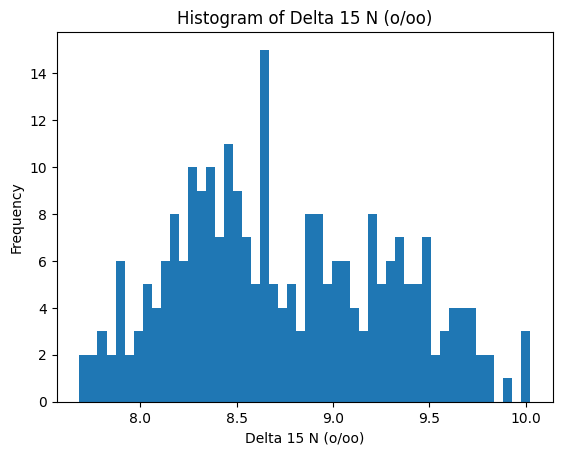

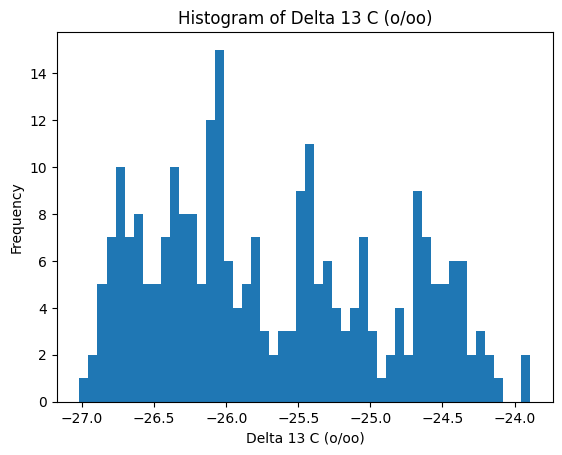

In [21]:
# Select integer columns
integer_columns = ["Date Egg","Culmen Length (mm)","Culmen Depth (mm)","Flipper Length (mm)","Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

# Convert to numeric
penguin_train_data = penguin_train_data.apply(pd.to_numeric, errors='coerce')

# Plot each column as a histogram
for col in integer_columns:
    plt.figure()
    plt.hist(penguin_train_data[col].dropna(), bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Although not normally distributed, they look all ok!

In [22]:
penguin_train_data[integer_columns] = penguin_train_data[integer_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() != x.min() else x)

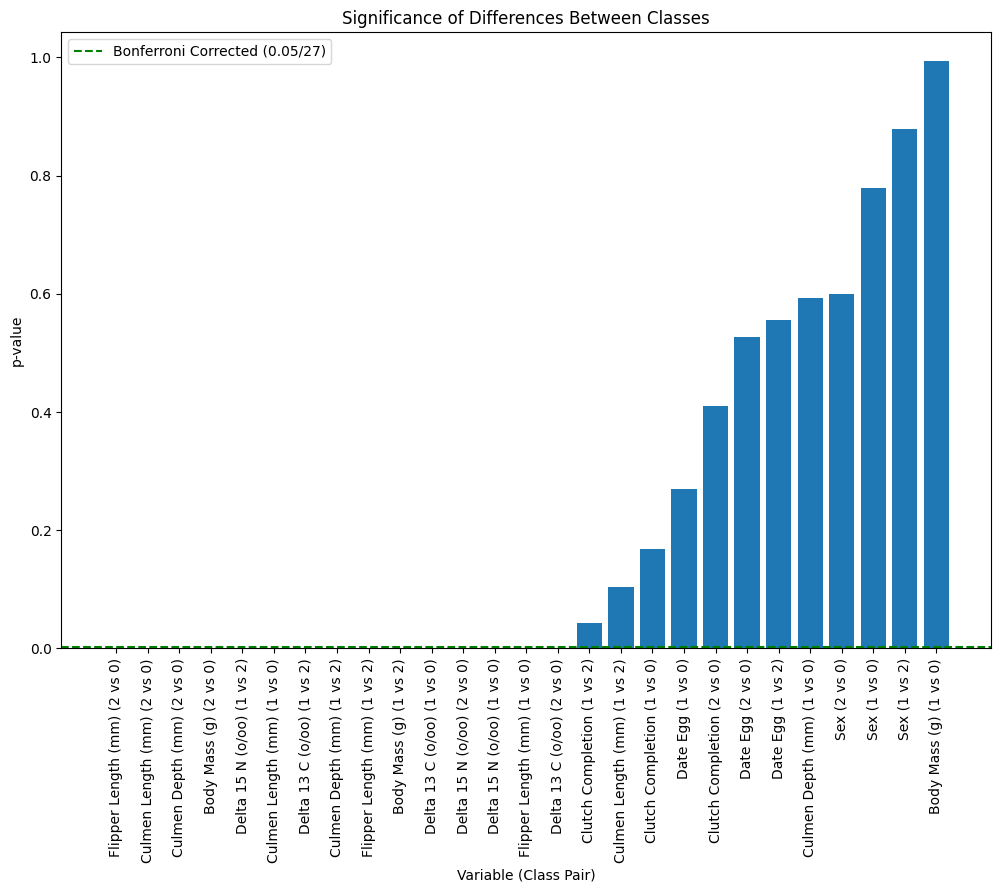

In [23]:
# Assuming penguin_train_data is already defined and loaded
# Convert columns to numeric
penguin_train_data = penguin_train_data.apply(pd.to_numeric, errors='coerce')

# Get unique classes
unique_classes = penguin_train_data['Species'].unique()

# Perform pairwise t-tests for each variable
p_values = {}
for i in range(len(unique_classes)):
    for j in range(i + 1, len(unique_classes)):
        class_i = unique_classes[i]
        class_j = unique_classes[j]
        group_i = penguin_train_data[penguin_train_data['Species'] == class_i]
        group_j = penguin_train_data[penguin_train_data['Species'] == class_j]
        
        for col in group_i.columns:
            if col != 'Species':
                t_stat, p_val = ttest_ind(group_i[col].dropna(), group_j[col].dropna(), nan_policy='omit')
                p_values[f'{col} ({class_i} vs {class_j})'] = p_val

# Sort p-values from smallest to largest
sorted_p_values = dict(sorted(p_values.items(), key=lambda item: item[1]))

# Calculate the Bonferroni corrected p-value
num_tests = len(sorted_p_values)
bonferroni_corrected_p_value = 0.05 / num_tests

# Plot the p-values
plt.figure(figsize=(12, 8))
plt.bar(sorted_p_values.keys(), sorted_p_values.values())
plt.axhline(y=bonferroni_corrected_p_value, color='g', linestyle='--', label=f'Bonferroni Corrected (0.05/{num_tests})')
plt.xticks(rotation=90)
plt.xlabel('Variable (Class Pair)')
plt.ylabel('p-value')
plt.title('Significance of Differences Between Classes')
plt.legend()
plt.show()

In [24]:
penguin_train_data = penguin_train_data.drop(["Date Egg", "Clutch Completion", "Sex"], axis=1)

In [25]:
class PenguinPreprocessor:
    def __init__(self):
        # Attributes to store min and max values after fitting
        self.min_vals = {}
        self.max_vals = {}
        self.integer_columns = [
            "Culmen Length (mm)", 
            "Culmen Depth (mm)",
            "Flipper Length (mm)", 
            "Body Mass (g)", 
            "Delta 15 N (o/oo)", 
            "Delta 13 C (o/oo)"
        ]

    def fit(self, df):
        """
        Drops unused columns, maps categories to numeric,
        and stores min/max values for integer columns.
        """
        input_df = df.copy()
        # Drop columns
        input_df.drop(["Island", "Comments"], axis=1, inplace=True, errors='ignore')
        input_df.dropna(inplace=True)
        input_df['Species'] = input_df['Species'].map({
            'Adelie Penguin (Pygoscelis adeliae)': 0,
            'Chinstrap penguin (Pygoscelis antarctica)': 1,
            'Gentoo penguin (Pygoscelis papua)': 2
        })
        input_df.drop(["Date Egg", "Clutch Completion", "Sex",
                 "Region", "Stage", "Individual ID", 
                 "Sample Number", "studyName"], axis=1, inplace=True, errors='ignore')
        input_df.dropna(inplace=True)
        
        # Store min and max from the fitted DataFrame
        for col in self.integer_columns:
            self.min_vals[col] = input_df[col].min()
            self.max_vals[col] = input_df[col].max()

    def transform(self, df):
        """
        Applies the same preprocessing and normalization steps
        using stored min and max values to avoid data leakage.
        """
        # Drop columns
        df.drop(["Island", "Comments"], axis=1, inplace=True, errors='ignore')
        df.dropna(inplace=True)
        df['Species'] = df['Species'].map({
            'Adelie Penguin (Pygoscelis adeliae)': 0,
            'Chinstrap penguin (Pygoscelis antarctica)': 1,
            'Gentoo penguin (Pygoscelis papua)': 2
        })
        df.drop(["Date Egg", "Clutch Completion", "Sex",
                 "Region", "Stage", "Individual ID", 
                 "Sample Number", "studyName"], axis=1, inplace=True, errors='ignore')
        df.dropna(inplace=True)
        
        # Scale the columns using the stored min/max
        for col in self.integer_columns:
            min_val = self.min_vals.get(col, None)
            max_val = self.max_vals.get(col, None)
            if min_val is not None and max_val is not None and min_val != max_val:
                df[col] = (df[col] - min_val) / (max_val - min_val)
        return df


penguin_data = pd.read_csv('penguins_lter.csv')

# Shuffle the data
penguin_data = penguin_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(penguin_data) * split_ratio)


penguin_train_data = penguin_data[:split_index].copy()
penguin_test_data = penguin_data[split_index:].copy()
preprocessor = PenguinPreprocessor()
preprocessor.fit(penguin_train_data)
penguin_train_data = preprocessor.transform(penguin_train_data)
penguin_test_data = preprocessor.transform(penguin_test_data)


In [26]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Model code:
class KNNmodel():
    def __init__(self, k=3, distance_function='euclidean'):
        self.k = k
        self.distance_function = distance_function
    
    def fit(self, X, y, binary_columns=None):
        self.X = X.astype(np.float32)
        self.y = y.astype(np.int32)
        if binary_columns is None:
            binary_columns = np.zeros(X.shape[1], dtype=bool)
        else:
            binary_columns = np.array(binary_columns)
        self.binary_columns = binary_columns
    
    def predict(self, X):
        X = X.astype(np.float32)
        predicted_y = []
        for i in range(X.shape[0]):
            distances = self._calculate_distances(X[i])
            nearest_k = np.argsort(distances)[:self.k]
            nearest_labels = self.y[nearest_k]
            predicted_y.append(np.bincount(nearest_labels).argmax())
        return np.array(predicted_y)

    def _distance_function(self, i, x):
        if self.distance_function == 'euclidean':
            return np.sqrt(np.sum((self.X[i, ~self.binary_columns] - x[~self.binary_columns]) ** 2))
        elif self.distance_function == 'manhattan':
            return np.sum(np.abs(self.X[i, ~self.binary_columns] - x[~self.binary_columns]))
        elif self.distance_function == 'chebyshev':
            return np.max(np.abs(self.X[i, ~self.binary_columns] - x[~self.binary_columns]))
        elif self.distance_function == 'cosine':
            return 1 - np.dot(self.X[i, ~self.binary_columns], x[~self.binary_columns]) / (np.linalg.norm(self.X[i, ~self.binary_columns]) * np.linalg.norm(x[~self.binary_columns]))
        elif self.distance_function == 'hamming':
            return np.sum(self.X[i, self.binary_columns] != x[self.binary_columns])
        
    def _calculate_distances(self, x):
        distances = np.zeros(self.X.shape[0])
        for i in range(self.X.shape[0]):
            continuous_distance = self._distance_function(i, x)
            hamming_distance = np.sum(self.X[i, self.binary_columns] != x[self.binary_columns])
            distances[i] = continuous_distance + hamming_distance
        return distances
    
    def evaluate_accuracy(self, X, y):
        y = y.astype(np.int32)
        y_pred = self.predict(X)
        
        if len(np.unique(y)) == 2:
            # Calculate AUROC for binary classification
            auroc = roc_auc_score(y, y_pred)
            return auroc
        else:
            # Calculate accuracy for multiclass classification without using sklearn's accuracy_score
            accuracy = np.mean(y_pred == y)
            return accuracy

KNN = KNNmodel(k=3)
X_train = penguin_train_data.drop('Species', axis=1).values
y_train = penguin_train_data['Species'].values
KNN.fit(X_train, y_train)

X_test = penguin_test_data.drop('Species', axis=1).values
y_test = penguin_test_data['Species'].values
accuracy = KNN.evaluate_accuracy(X_test, y_test)
print(f"Average accuracy rate on penguin dataset = {accuracy}")




KNN = KNNmodel(k=3)


X_train = train_data.drop('num', axis=1).values
y_train = train_data['num'].values

# Get a list of boolean values indicating which columns have only two unique values
binary_columns = train_data.drop('num', axis=1).nunique() == 2

# Convert to a list
binary_columns_list = binary_columns.tolist()

KNN.fit(X_train, y_train, binary_columns=binary_columns_list)

X_test = test_data.drop('num', axis=1).values
y_test = test_data['num'].values
accuracy = KNN.evaluate_accuracy(X_test, y_test)
print(f"Average accuracy rate on heart disease dataset = {accuracy}")



            

Average accuracy rate on penguin dataset = 0.9850746268656716
Average accuracy rate on heart disease dataset = 0.8714285714285714


In [27]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_leaf_instances=1, cost='gini'):
        self.max_depth = max_depth
        self.min_leaf_instances = min_leaf_instances
        self.cost = cost
        self.tree = None

    def gini(self, y):
        unique, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return 1 - np.sum(probs**2)

    def entropy(self, y):
        unique, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return -np.sum(probs * np.log2(probs))

    def misclassification(self, y):
        if len(y) == 0:
            return 0
        unique, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        return 1 - np.max(probs)

    def greedy_search(self, X, y):
        if self.cost == 'gini':
            cost_function = self.gini
        elif self.cost == 'entropy':
            cost_function = self.entropy
        elif self.cost == 'misclassification':
            cost_function = self.misclassification
        
        best_cost = np.inf
        best_index = best_threshold = None
        for x_index in range(X.shape[1]):
            for threshold in np.unique(X[:, x_index]):
                left_indices = X[:, x_index] < threshold
                right_indices = ~left_indices
                left_cost = cost_function(y[left_indices])
                right_cost = cost_function(y[right_indices])
                total_cost = (left_cost * np.sum(left_indices) + right_cost * np.sum(right_indices)) / len(y)
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_index = x_index
                    best_threshold = threshold
        return best_index, best_threshold, best_cost

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or len(y) <= self.min_leaf_instances or (self.max_depth is not None and depth >= self.max_depth):
            return {'type': 'leaf', 'class': np.bincount(y).argmax()}
        
        best_index, best_threshold, best_cost = self.greedy_search(X, y)
        if best_index is None:
            return {'type': 'leaf', 'class': np.bincount(y).argmax()}
        
        left_indices = X[:, best_index] < best_threshold
        right_indices = ~left_indices
        
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return {
            'type': 'node',
            'feature_index': best_index,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }

    def predict(self, X):
        return np.array([self._predict_instance(instance, self.tree) for instance in X])

    def _predict_instance(self, instance, node):
        if node['type'] == 'leaf':
            return node['class']
        if instance[node['feature_index']] < node['threshold']:
            return self._predict_instance(instance, node['left'])
        else:
            return self._predict_instance(instance, node['right'])
        
    def evaluate_accuracy(self, X, y):
        y = y.astype(np.int32)
        y_pred = self.predict(X)
        
        if len(np.unique(y)) == 2:
            # Calculate AUROC for binary classification
            auroc = roc_auc_score(y, y_pred)
            return auroc
        else:
            # Calculate accuracy for multiclass classification without using sklearn's accuracy_score
            accuracy = np.mean(y_pred == y)
            return accuracy



dt = DecisionTreeClassifier(max_depth=3, min_leaf_instances=2, cost='gini')

X_train = penguin_train_data.drop('Species', axis=1).values
y_train = penguin_train_data['Species'].values
dt.fit(X_train, y_train)

X_test = penguin_test_data.drop('Species', axis=1).values
y_test = penguin_test_data['Species'].values
accuracy = dt.evaluate_accuracy(X_test, y_test)
print(f"Average accuracy rate on penguin dataset = {accuracy}")




# Example usage:
dt = DecisionTreeClassifier(max_depth=3, min_leaf_instances=2, cost='gini')

X_train = train_data.drop('num', axis=1).values
y_train = train_data['num'].values


dt.fit(X_train, y_train)

X_test = test_data.drop('num', axis=1).values
y_test = test_data['num'].values
accuracy = dt.evaluate_accuracy(X_test, y_test)
print(f"Average accuracy rate on heart disease dataset = {accuracy}")





Average accuracy rate on penguin dataset = 0.9402985074626866
Average accuracy rate on heart disease dataset = 0.8535714285714285


# EXPERIMENTS

Before doing any experiments, we first need to make a cross-validator to make sure that our results arent biased from a small data subset

In [28]:
class CrossValidator:
    def __init__(self, model, preprocessor, label_column, k=5):
        self.model = model
        self.k = k
        self.preprocessor = preprocessor()
        self.label_column = label_column

    def split(self, df):
        df = df.copy()
        indices = np.arange(df.shape[0])
        np.random.shuffle(indices)
        fold_sizes = np.full(self.k, df.shape[0] // self.k, dtype=int)
        fold_sizes[:df.shape[0] % self.k] += 1
        current = 0
        folds = []
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            folds.append(indices[start:stop])
            current = stop
        return folds

    def cross_validate(self, df):
        df = df.copy()
        folds = self.split(df)
        scores = []
        for i in range(self.k):
            train_indices = np.hstack([folds[j] for j in range(self.k) if j != i])
            test_indices = folds[i]
            train_df = df.iloc[train_indices].copy()
            test_df = df.iloc[test_indices].copy()
            

            self.preprocessor.fit(train_df)
            X_train = self.preprocessor.transform(train_df)
            y_train = X_train[self.label_column]
            X_train = X_train.drop(columns=[self.label_column])
            
            X_test = self.preprocessor.transform(test_df)
            y_test = X_test[self.label_column]
            X_test = X_test.drop(columns=[self.label_column])
            
            self.model.fit(X_train.values, y_train.values)
            score = self.model.evaluate_accuracy(X_test.values, y_test.values)
            scores.append(score)
        return np.mean(scores), np.std(scores)


For KNN and DT algorithm, compare their AUROCs on dataset 1 (i.e., binary prediction of
heart disease) and accuracy on dataset 2 (i.e., species classification).

In [29]:
# KNN first:

KNN = KNNmodel(k=3)

cv = CrossValidator(KNN, PenguinPreprocessor, 'Species', k=5)

scores = cv.cross_validate(penguin_data)

print(f"Average accuracy on penguin dataset = {scores[0]:.4f} +/- {scores[1]:.4f}")


KNN = KNNmodel(k=3)

cv = CrossValidator(KNN, HeartDiseasePreprocessor, 'num', k=5)

scores = cv.cross_validate(data)

print(f"Average accuracy on heart disease dataset = {scores[0]:.4f} +/- {scores[1]:.4f}")

dt = DecisionTreeClassifier(max_depth=3, min_leaf_instances=2, cost='gini')

cv = CrossValidator(dt, PenguinPreprocessor, 'Species', k=5)

scores = cv.cross_validate(penguin_data)

print(f"Average accuracy on penguin dataset = {scores[0]:.4f} +/- {scores[1]:.4f}")

dt = DecisionTreeClassifier(max_depth=3, min_leaf_instances=2, cost='gini')

cv = CrossValidator(dt, HeartDiseasePreprocessor, 'num', k=5)

scores = cv.cross_validate(data)

print(f"Average accuracy on heart disease dataset = {scores[0]:.4f} +/- {scores[1]:.4f}")

Average accuracy on penguin dataset = 1.0000 +/- 0.0000
Average accuracy on heart disease dataset = 0.8064 +/- 0.0540
Average accuracy on penguin dataset = 0.9506 +/- 0.0232
Average accuracy on heart disease dataset = 0.7565 +/- 0.0433


Using default settings, it appears that the KNN outperforms the DT

Test different K values and see how it affects the training data accuracy and test data accuracy of KNN.

In [30]:
def testkvalues(k):
    KNN = KNNmodel(k=k)

    cv = CrossValidator(KNN, PenguinPreprocessor, 'Species', k=5)

    scores = cv.cross_validate(penguin_data)

    print(f"Average accuracy on penguin dataset at k of {k} = {scores[0]:.4f} +/- {scores[1]:.4f}")


    KNN = KNNmodel(k=k)

    cv = CrossValidator(KNN, HeartDiseasePreprocessor, 'num', k=5)

    scores = cv.cross_validate(data)

    print(f"Average AUROC on heart disease dataset at k of {k} = {scores[0]:.4f} +/- {scores[1]:.4f}")
    
testkvalues(1)
testkvalues(2)
testkvalues(3)
testkvalues(4)
testkvalues(5)
testkvalues(6)
testkvalues(7)

Average accuracy on penguin dataset at k of 1 = 0.9909 +/- 0.0075
Average AUROC on heart disease dataset at k of 1 = 0.7804 +/- 0.0254
Average accuracy on penguin dataset at k of 2 = 1.0000 +/- 0.0000
Average AUROC on heart disease dataset at k of 2 = 0.7713 +/- 0.0439
Average accuracy on penguin dataset at k of 3 = 0.9940 +/- 0.0119
Average AUROC on heart disease dataset at k of 3 = 0.8155 +/- 0.0455
Average accuracy on penguin dataset at k of 4 = 0.9968 +/- 0.0063
Average AUROC on heart disease dataset at k of 4 = 0.8132 +/- 0.0335
Average accuracy on penguin dataset at k of 5 = 0.9941 +/- 0.0073
Average AUROC on heart disease dataset at k of 5 = 0.8050 +/- 0.0656
Average accuracy on penguin dataset at k of 6 = 1.0000 +/- 0.0000
Average AUROC on heart disease dataset at k of 6 = 0.8183 +/- 0.0415
Average accuracy on penguin dataset at k of 7 = 0.9970 +/- 0.0060
Average AUROC on heart disease dataset at k of 7 = 0.8211 +/- 0.0258


It seems like the K-value has little impact on our penguin dataset, while it has a more notable imapct on the heart disease dataset.

Similarly, check how maximum tree depth can affect the performance of DT on the provided datasets.

In [31]:
def testdepthvalues(depth):
    dt = DecisionTreeClassifier(max_depth=depth, min_leaf_instances=2, cost='gini')

    cv = CrossValidator(dt, PenguinPreprocessor, 'Species', k=5)

    scores = cv.cross_validate(penguin_data)

    print(f"Average accuracy on penguin dataset at depth of {depth} = {scores[0]:.4f} +/- {scores[1]:.4f}")

    dt = DecisionTreeClassifier(max_depth=depth, min_leaf_instances=2, cost='gini')

    cv = CrossValidator(dt, HeartDiseasePreprocessor, 'num', k=5)

    scores = cv.cross_validate(data)

    print(f"Average AUROC on heart disease dataset at depth of {depth} = {scores[0]:.4f} +/- {scores[1]:.4f}")
    
testdepthvalues(1)
testdepthvalues(2)
testdepthvalues(3)
testdepthvalues(4)
testdepthvalues(5)
testdepthvalues(6)
testdepthvalues(7)


Average accuracy on penguin dataset at depth of 1 = 0.7814 +/- 0.0483
Average AUROC on heart disease dataset at depth of 1 = 0.7130 +/- 0.0848
Average accuracy on penguin dataset at depth of 2 = 0.9385 +/- 0.0097
Average AUROC on heart disease dataset at depth of 2 = 0.7398 +/- 0.0322
Average accuracy on penguin dataset at depth of 3 = 0.9509 +/- 0.0108
Average AUROC on heart disease dataset at depth of 3 = 0.7661 +/- 0.0696
Average accuracy on penguin dataset at depth of 4 = 0.9723 +/- 0.0061
Average AUROC on heart disease dataset at depth of 4 = 0.7955 +/- 0.0831
Average accuracy on penguin dataset at depth of 5 = 0.9725 +/- 0.0147
Average AUROC on heart disease dataset at depth of 5 = 0.7665 +/- 0.0651
Average accuracy on penguin dataset at depth of 6 = 0.9603 +/- 0.0244
Average AUROC on heart disease dataset at depth of 6 = 0.7777 +/- 0.0301
Average accuracy on penguin dataset at depth of 7 = 0.9663 +/- 0.0112
Average AUROC on heart disease dataset at depth of 7 = 0.7116 +/- 0.0663

Here we see that the tree depth has a larger impact on our average accuracy/AUROC, but it is still lower when compared to the KNN.

Try out different distance/cost functions for both models.

In [32]:
def testdifferentdistacefunctions(distance):
    KNN = KNNmodel(k=3, distance_function=distance)

    cv = CrossValidator(KNN, PenguinPreprocessor, 'Species', k=5)

    scores = cv.cross_validate(penguin_data)

    print(f"Average accuracy on penguin dataset at distance function of {distance} = {scores[0]:.4f} +/- {scores[1]:.4f}")


    KNN = KNNmodel(k=3, distance_function=distance)

    cv = CrossValidator(KNN, HeartDiseasePreprocessor, 'num', k=5)

    scores = cv.cross_validate(data)

    print(f"Average AUROC on heart disease dataset at distance function of {distance} = {scores[0]:.4f} +/- {scores[1]:.4f}")
    
testdifferentdistacefunctions('euclidean')
testdifferentdistacefunctions('manhattan')
testdifferentdistacefunctions('chebyshev')
testdifferentdistacefunctions('cosine')
testdifferentdistacefunctions('hamming')

Average accuracy on penguin dataset at distance function of euclidean = 0.9908 +/- 0.0123
Average AUROC on heart disease dataset at distance function of euclidean = 0.8160 +/- 0.0391
Average accuracy on penguin dataset at distance function of manhattan = 0.9938 +/- 0.0125
Average AUROC on heart disease dataset at distance function of manhattan = 0.8131 +/- 0.0172
Average accuracy on penguin dataset at distance function of chebyshev = 0.9969 +/- 0.0063
Average AUROC on heart disease dataset at distance function of chebyshev = 0.7614 +/- 0.0379
Average accuracy on penguin dataset at distance function of cosine = 0.9908 +/- 0.0075
Average AUROC on heart disease dataset at distance function of cosine = 0.7827 +/- 0.0587
Average accuracy on penguin dataset at distance function of hamming = 0.2778 +/- 0.1020
Average AUROC on heart disease dataset at distance function of hamming = 0.5000 +/- 0.0000


From this, we can see that they all achieve somewhat similar results, except for the hamming distance, which should only be used on categorical features

In [36]:
def testdifferentcostfunctions(cost):
    dt = DecisionTreeClassifier(max_depth=3, min_leaf_instances=2, cost=cost)

    cv = CrossValidator(dt, PenguinPreprocessor, 'Species', k=5)

    scores = cv.cross_validate(penguin_data)

    print(f"Average accuracy on penguin dataset at cost function of {cost} = {scores[0]:.4f} +/- {scores[1]:.4f}")

    dt = DecisionTreeClassifier(max_depth=3, min_leaf_instances=2, cost=cost)

    cv = CrossValidator(dt, HeartDiseasePreprocessor, 'num', k=5)

    scores = cv.cross_validate(data)

    print(f"Average AUROC on heart disease dataset at cost function of {cost} = {scores[0]:.4f} +/- {scores[1]:.4f}")
    
testdifferentcostfunctions('gini')
testdifferentcostfunctions('entropy')


Average accuracy on penguin dataset at cost function of gini = 0.9690 +/- 0.0143
Average AUROC on heart disease dataset at cost function of gini = 0.7881 +/- 0.0511
Average accuracy on penguin dataset at cost function of entropy = 0.9565 +/- 0.0211
Average AUROC on heart disease dataset at cost function of entropy = 0.7549 +/- 0.0491


Here, both seem to give similar resuts, with the gini score being slightly higher

For the binary classification task, plot the ROC for KNN and DT on the test data. Both
ROC curves need to be plotted on the same plot to enable comparison between of the
method performance. Show the AUROC of each method in the figure legend.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score



knn = KNNmodel(k=3)
y_test_prob = knn.predict(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.clf()
plt.plot(fpr, tpr, "b-", lw=2, label="AUROC = %0.2f"%roc_auc)
plt.axline((0, 0), (1, 1), linestyle="--", lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC in predicting cancer')
plt.legend(loc="best")
plt.savefig("roc_curve.png",bbox_inches='tight', dpi=300)